# In this file we take a detailed look at the model found in notebook 1:
1) Titanic Model - Automatic modeling using Genetic Programming

### Imports

In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from math import isclose
from numpy.lib.function_base import append
from simpful import *
from simpful.rules import swap_none
from modules.evolutiongp_multi__ import FuzzyEvolution
from numpy import load
import time
import regex as re
import copy

### Load model

In [2]:
with open('./saved_models/titanic_model_2.pkl', 'rb') as input:
    titanic = pickle.load(input)

In [3]:
example_model = titanic[0][0]

In [4]:
rules = swap_none(example_model.raw_rules, example_model.probas_)
rules

['IF (fare IS cluster0) OR (passclass IS cluster0) AND_p (parentchild IS cluster0) THEN P(OUTCOME IS DEATH)=0.617, P(OUTCOME IS ALIVE)=0.383',
 'IF (NOT (sex IS cluster1)) AND (embarked IS cluster1) OR (passclass IS cluster1) AND (age IS cluster1) THEN P(OUTCOME IS DEATH)=0.0, P(OUTCOME IS ALIVE)=1.0',
 'IF (NOT (parentchild IS cluster2)) THEN P(OUTCOME IS DEATH)=0.71, P(OUTCOME IS ALIVE)=0.29']

Save rules for: Normal_Prediction_Workflow_Titanic_Example.ipynb

In [5]:
def save_object(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)


save_object(rules, './saved_pickles/rules.pkl')

#### Generated Probabilities


In [6]:
example_model.probas_

array([[6.17132634e-01, 3.82867366e-01],
       [1.11022302e-16, 1.00000000e+00],
       [7.09838488e-01, 2.90161512e-01]])

In [7]:
save_object(example_model.probas_, './saved_pickles/probas.pkl')

#### Fitness and accuracy


In [8]:
print(example_model.fitness_)
print(example_model.evaluate_accuracy())

0.6566534914361002
0.8100558659217877


### Centers and Widths


In [9]:
for key in example_model._lvs.keys():
    print(key)

sex
parentchild
fare
embarked
passclass
age


In [10]:
example_model.centers

array([[ 5.93051915e-04, -2.72131405e-02,  5.15153612e-01,
        -2.35815072e-01, -1.08228269e+00,  6.26077349e-01],
       [ 6.16303331e-01, -3.08629406e-01, -3.46013965e-01,
         3.34873711e-01,  5.57792285e-01, -1.31929020e-01],
       [-9.40738869e-01,  3.79346084e-01, -3.31693177e-02,
        -8.60142602e-02,  1.77324365e-01, -3.28811985e-01]])

In [11]:
example_model.widths

array([[1.96797309, 1.96797309, 1.96797309, 1.96797309, 1.96797309,
        1.96797309],
       [1.83200106, 1.83200106, 1.83200106, 1.83200106, 1.83200106,
        1.83200106],
       [1.83200106, 1.83200106, 1.83200106, 1.83200106, 1.83200106,
        1.83200106]])

### Linguistic Vars Plotted

<AxesSubplot:xlabel='sex', ylabel='Membership degree'>

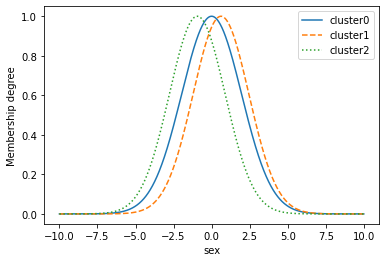

In [12]:
fig, ax = plt.subplots(1,1)
example_model._lvs['sex'].draw(ax)

<AxesSubplot:xlabel='parentchild', ylabel='Membership degree'>

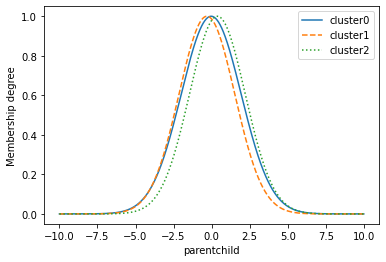

In [13]:
fig_, ax_ = plt.subplots(1,1)
example_model._lvs['parentchild'].draw(ax_)

<AxesSubplot:xlabel='fare', ylabel='Membership degree'>

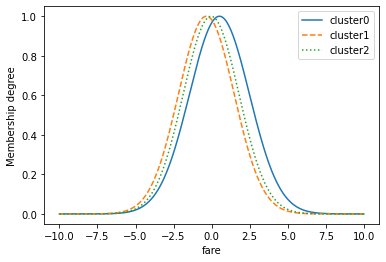

In [14]:
fig__, ax__ = plt.subplots(1,1)
example_model._lvs['fare'].draw(ax__)

<AxesSubplot:xlabel='embarked', ylabel='Membership degree'>

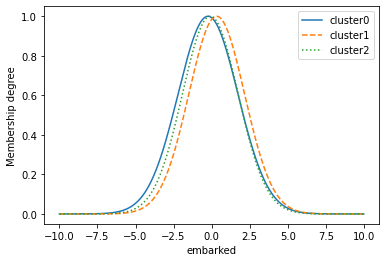

In [15]:
fig____, ax____ = plt.subplots(1,1)
example_model._lvs['embarked'].draw(ax____)

<AxesSubplot:xlabel='passclass', ylabel='Membership degree'>

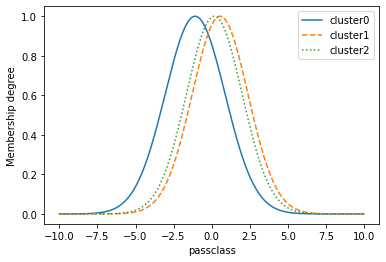

In [16]:
fig___, ax___ = plt.subplots(1,1)
example_model._lvs['passclass'].draw(ax___)

<AxesSubplot:xlabel='age', ylabel='Membership degree'>

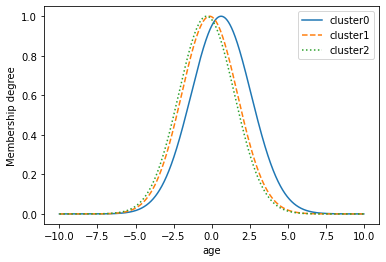

In [17]:
fig_____, ax_____ = plt.subplots(1,1)
example_model._lvs['age'].draw(ax_____)